In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("dataset/California Wildfire Damage.csv")
df

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
95,INC1095,2018-01-16,Mendocino County,13112,1468,46,281,89,17,4008.58,Human Activity
96,INC1096,2022-07-07,Shasta County,39209,710,282,189,34,14,376.72,Human Activity
97,INC1097,2016-05-18,Shasta County,11863,702,9,40,100,1,1474.78,Human Activity
98,INC1098,2014-06-24,Napa Valley,1338,1619,262,293,94,3,3308.74,Human Activity


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.dropna(subset=["Date", "Area_Burned (Acres)", "Cause"], inplace=True)

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Replace infinite values with NaN
df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# Set style for plots
sns.set(style="whitegrid")

In [60]:
df.tail()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year,Month,Severity,Financial_Loss_Per_Acre,Fatalities_Per_Acre
95,INC1095,2018-01-16,Mendocino County,13112,1468,46,281,89,17,4008.58,Human Activity,2018,1,5668.558,0.305718,0.001297
96,INC1096,2022-07-07,Shasta County,39209,710,282,189,34,14,376.72,Human Activity,2022,7,15732.272,0.009608,0.000357
97,INC1097,2016-05-18,Shasta County,11863,702,9,40,100,1,1474.78,Human Activity,2016,5,4912.978,0.124318,0.000084
98,INC1098,2014-06-24,Napa Valley,1338,1619,262,293,94,3,3308.74,Human Activity,2014,6,885.774,2.472900,0.002242
99,INC1099,2021-03-20,Mendocino County,44299,1217,172,176,81,20,4276.78,Human Activity,2021,3,18169.478,0.096543,0.000451


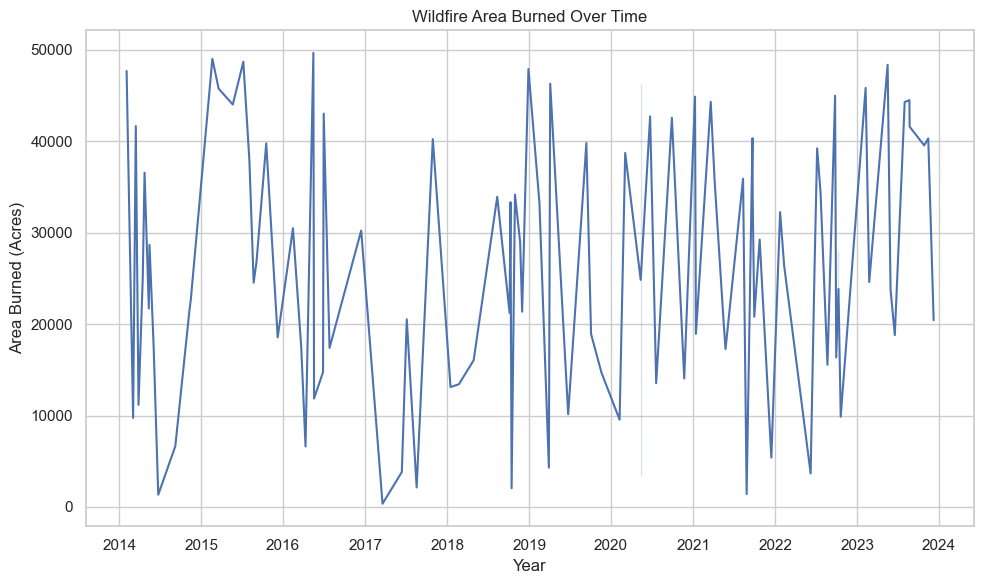

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Date", y="Area_Burned (Acres)")
plt.title("Wildfire Area Burned Over Time")
plt.xlabel("Year")
plt.ylabel("Area Burned (Acres)")
plt.tight_layout()
plt.show()

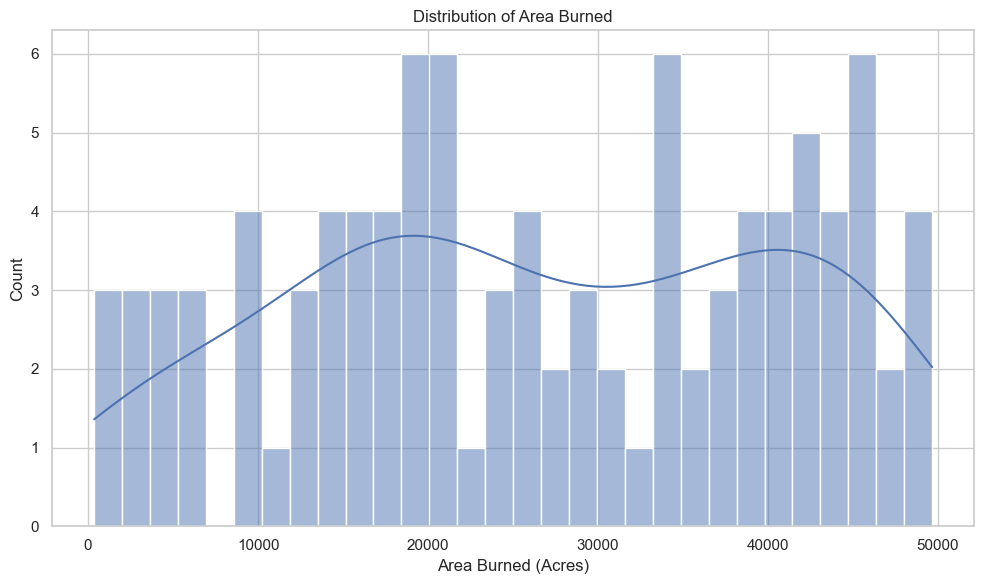

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Area_Burned (Acres)"], bins=30, kde=True)
plt.title("Distribution of Area Burned")
plt.xlabel("Area Burned (Acres)")
plt.tight_layout()
plt.show()

C:\Users\ishau\AppData\Local\Temp\ipykernel_17388\3935305603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Cause", palette="Set2")


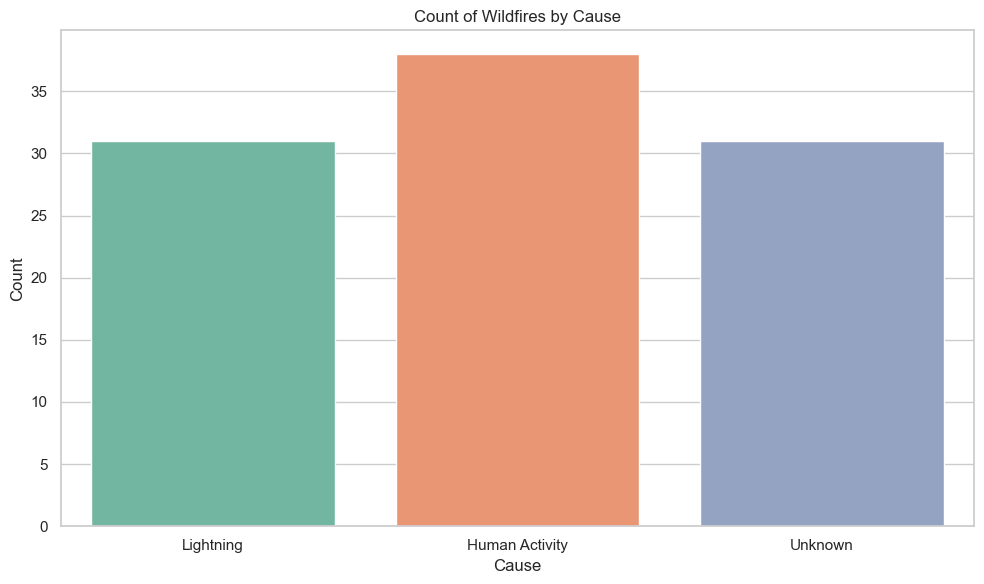

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Cause", palette="Set2")
plt.title("Count of Wildfires by Cause")
plt.xlabel("Cause")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\ishau\AppData\Local\Temp\ipykernel_17388\845150165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x="Estimated_Financial_Loss (Million $)", y="Location", palette="Blues")


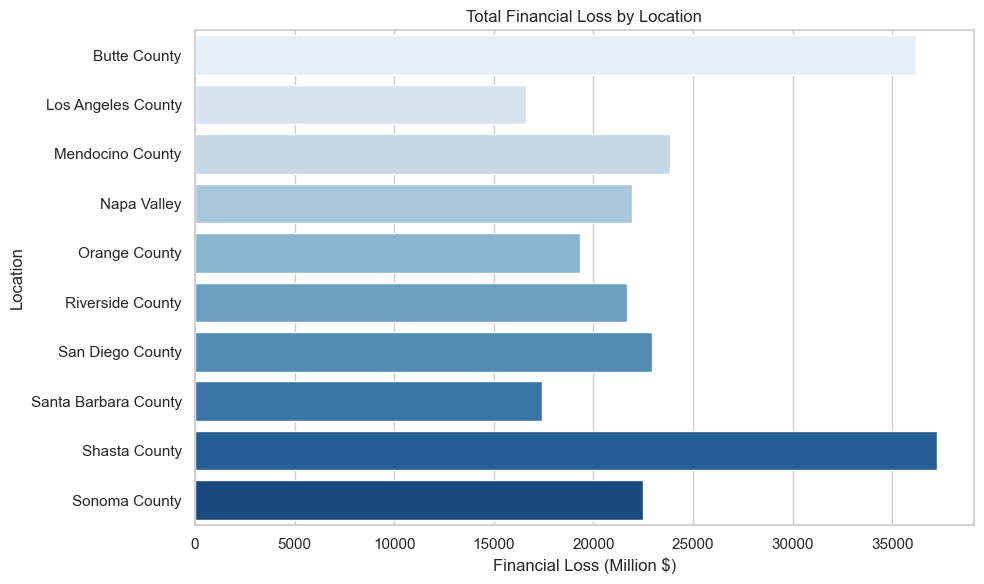

In [21]:
df_grouped = df.groupby("Location")["Estimated_Financial_Loss (Million $)"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x="Estimated_Financial_Loss (Million $)", y="Location", palette="Blues")
plt.title("Total Financial Loss by Location")
plt.xlabel("Financial Loss (Million $)")
plt.tight_layout()
plt.show()

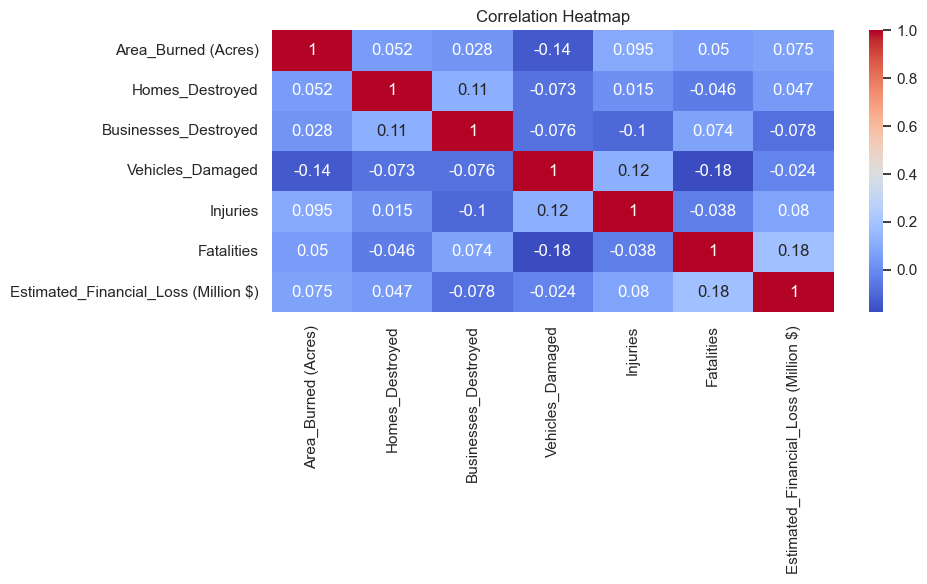

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

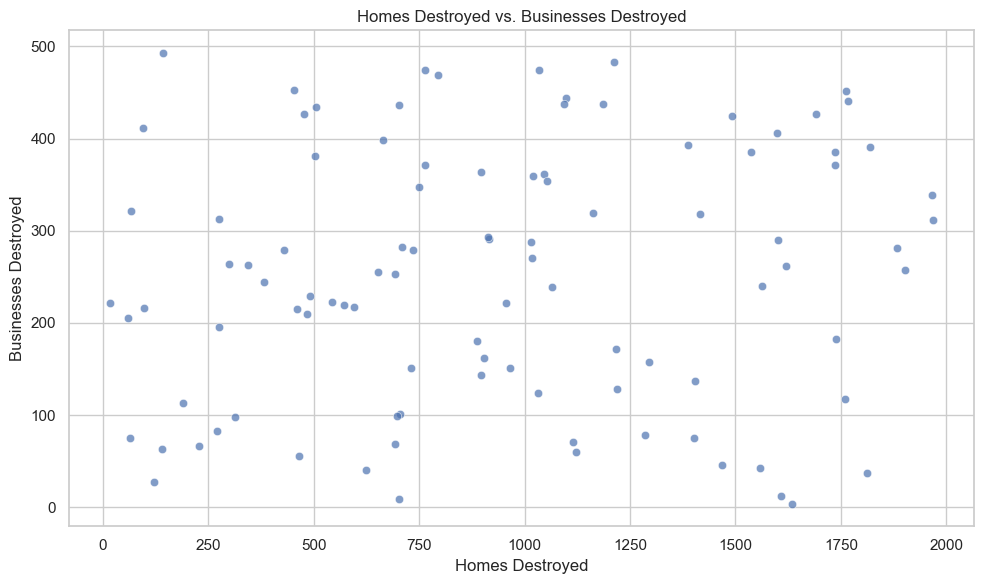

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Homes_Destroyed", y="Businesses_Destroyed", alpha=0.7)
plt.title("Homes Destroyed vs. Businesses Destroyed")
plt.xlabel("Homes Destroyed")
plt.ylabel("Businesses Destroyed")
plt.tight_layout()
plt.show()

C:\Users\ishau\AppData\Local\Temp\ipykernel_17388\1724030655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_fatalities, x="Fatalities", y="Location", palette="Reds")


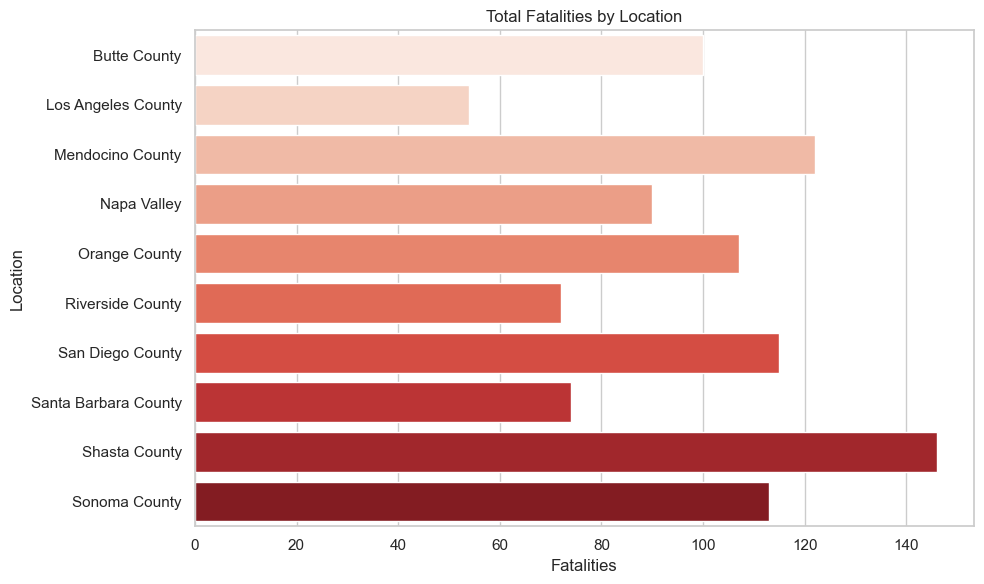

In [27]:
df_fatalities = df.groupby("Location")["Fatalities"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_fatalities, x="Fatalities", y="Location", palette="Reds")
plt.title("Total Fatalities by Location")
plt.xlabel("Fatalities")
plt.tight_layout()
plt.show()

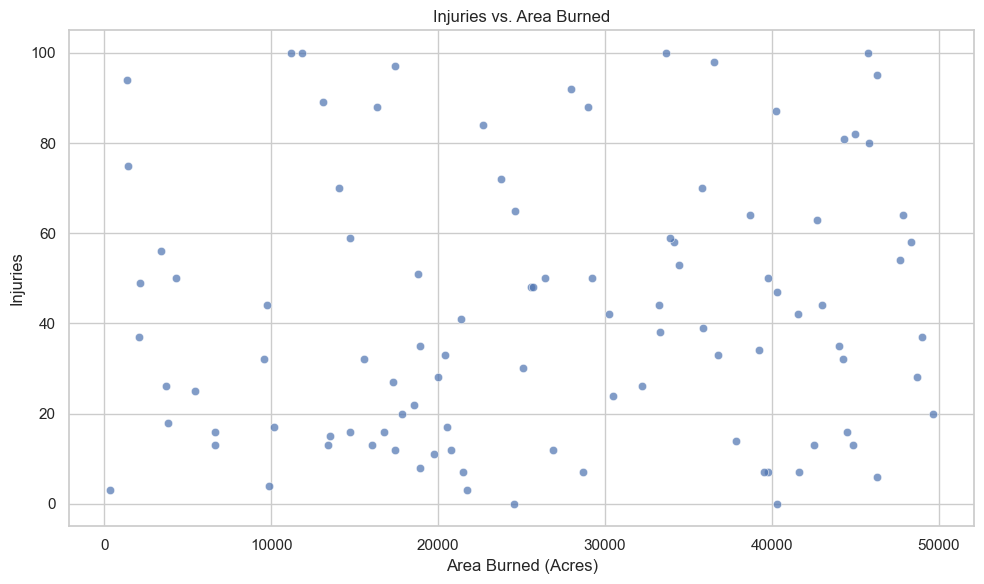

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Area_Burned (Acres)", y="Injuries", alpha=0.7)
plt.title("Injuries vs. Area Burned")
plt.xlabel("Area Burned (Acres)")
plt.ylabel("Injuries")
plt.tight_layout()
plt.show()

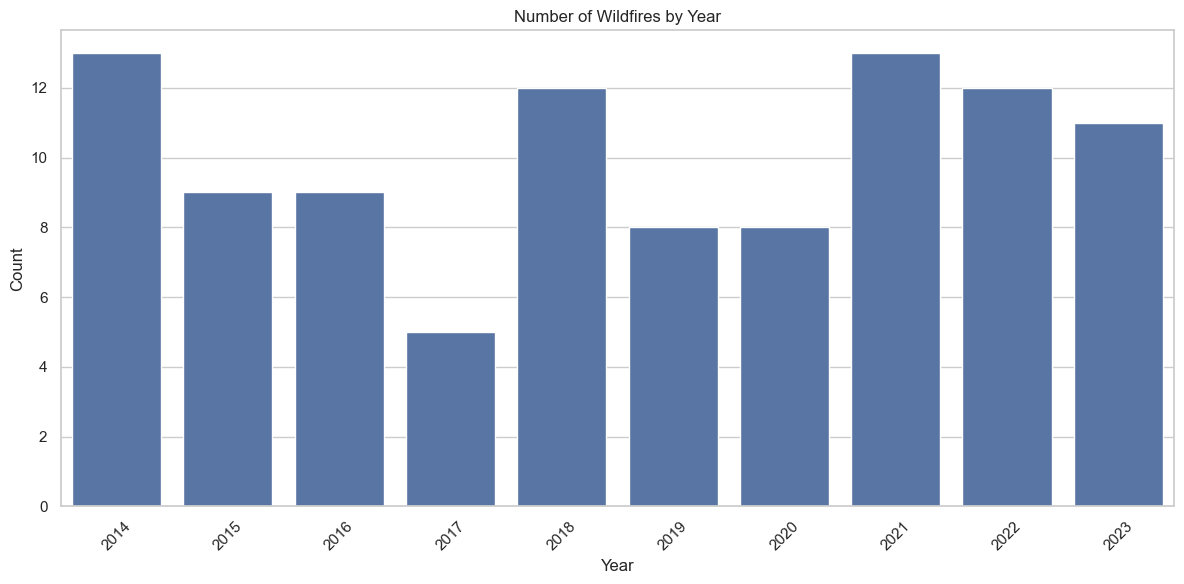

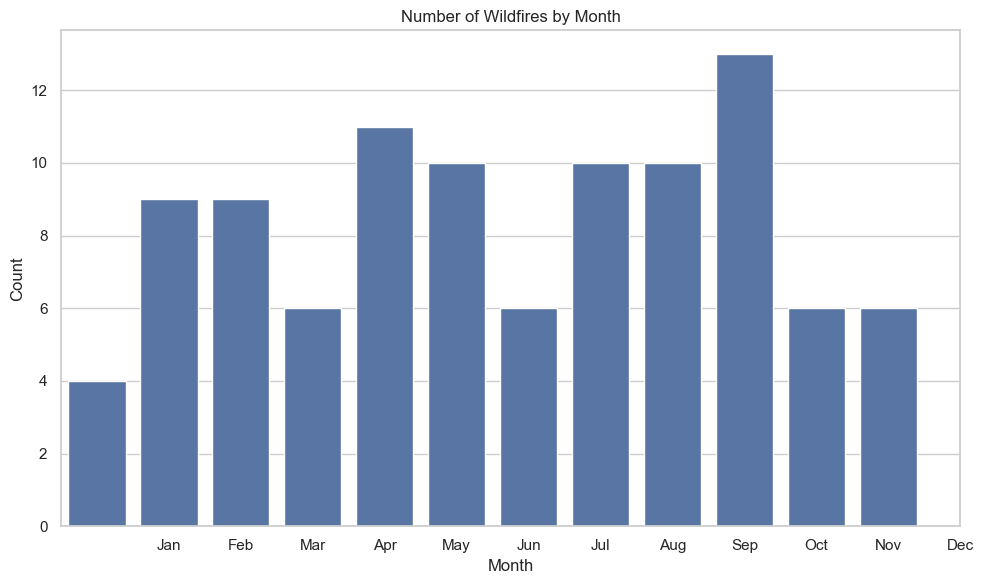

In [33]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

yearly_fires = df.groupby('Year').size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_fires, x='Year', y='Count')
plt.title('Number of Wildfires by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

monthly_fires = df.groupby('Month').size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_fires, x='Month', y='Count')
plt.title('Number of Wildfires by Month')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

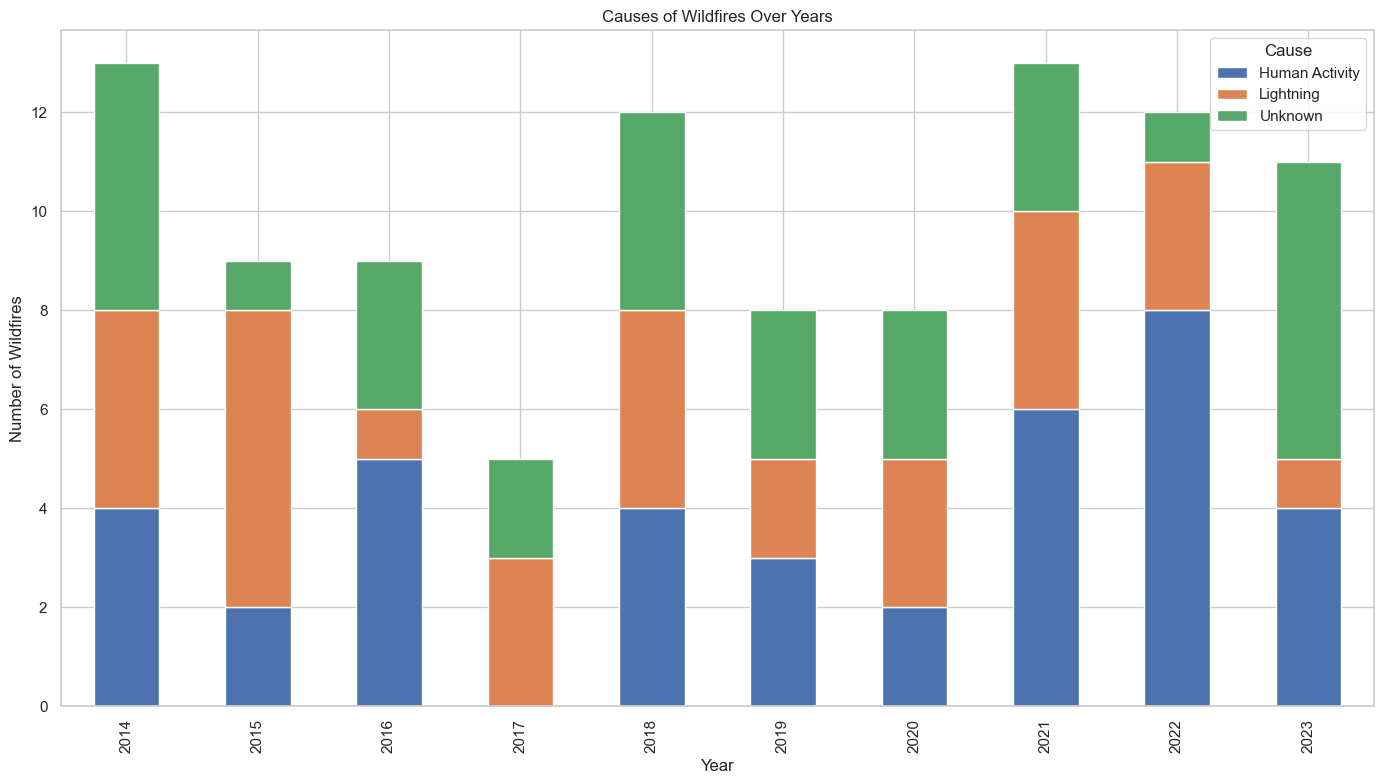

In [35]:
cause_by_year = pd.crosstab(df['Year'], df['Cause'])
plt.figure(figsize=(14, 8))
cause_by_year.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Causes of Wildfires Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Wildfires')
plt.legend(title='Cause')
plt.tight_layout()
plt.show()

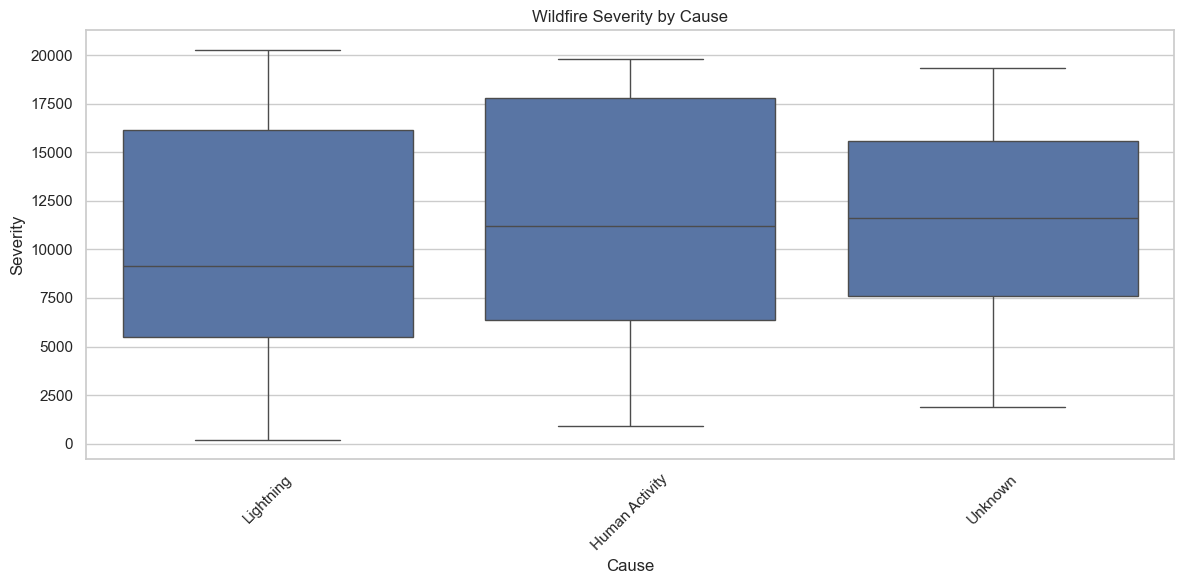

In [39]:
df['Severity'] = df['Area_Burned (Acres)'] * 0.4 + df['Fatalities'] * 0.3 + df['Injuries'] * 0.2 + df['Estimated_Financial_Loss (Million $)'] * 0.1

# Analyze severity by cause
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Cause', y='Severity')
plt.title('Wildfire Severity by Cause')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

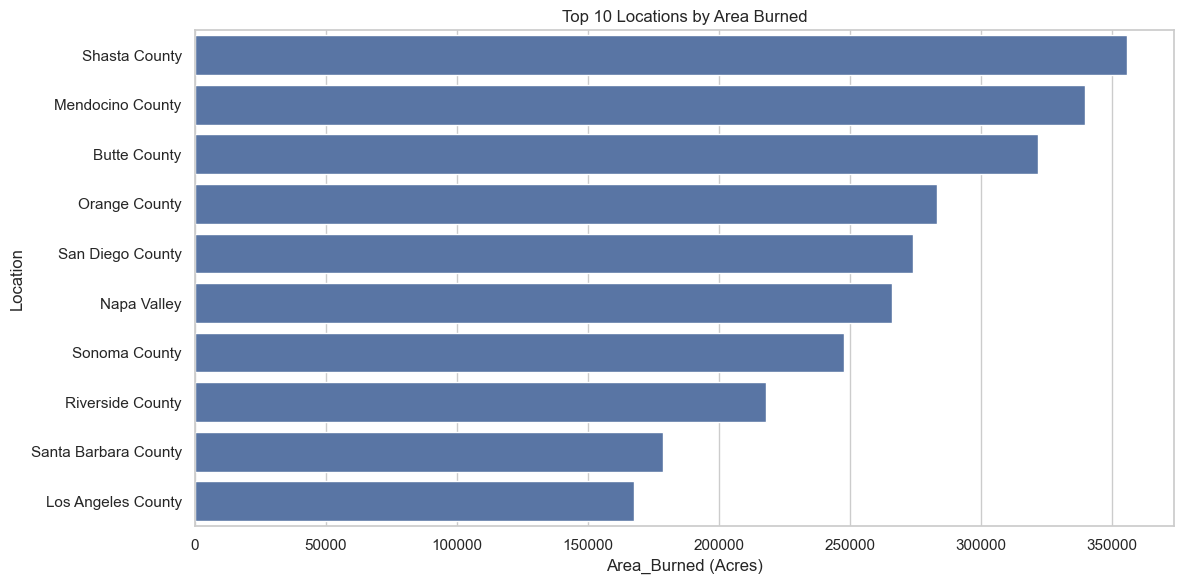

In [41]:
# Top 10 locations by area burned
top_locations = df.groupby('Location')['Area_Burned (Acres)'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x='Area_Burned (Acres)', y='Location')
plt.title('Top 10 Locations by Area Burned')
plt.tight_layout()
plt.show()

In [43]:
from scipy import stats

causes = df['Cause'].unique()
area_by_cause = [df[df['Cause'] == cause]['Area_Burned (Acres)'].values for cause in causes]
f_stat, p_val = stats.f_oneway(*area_by_cause)
print(f"ANOVA results: F-statistic = {f_stat}, p-value = {p_val}")

ANOVA results: F-statistic = 0.3294479518151244, p-value = 0.7201224112153589


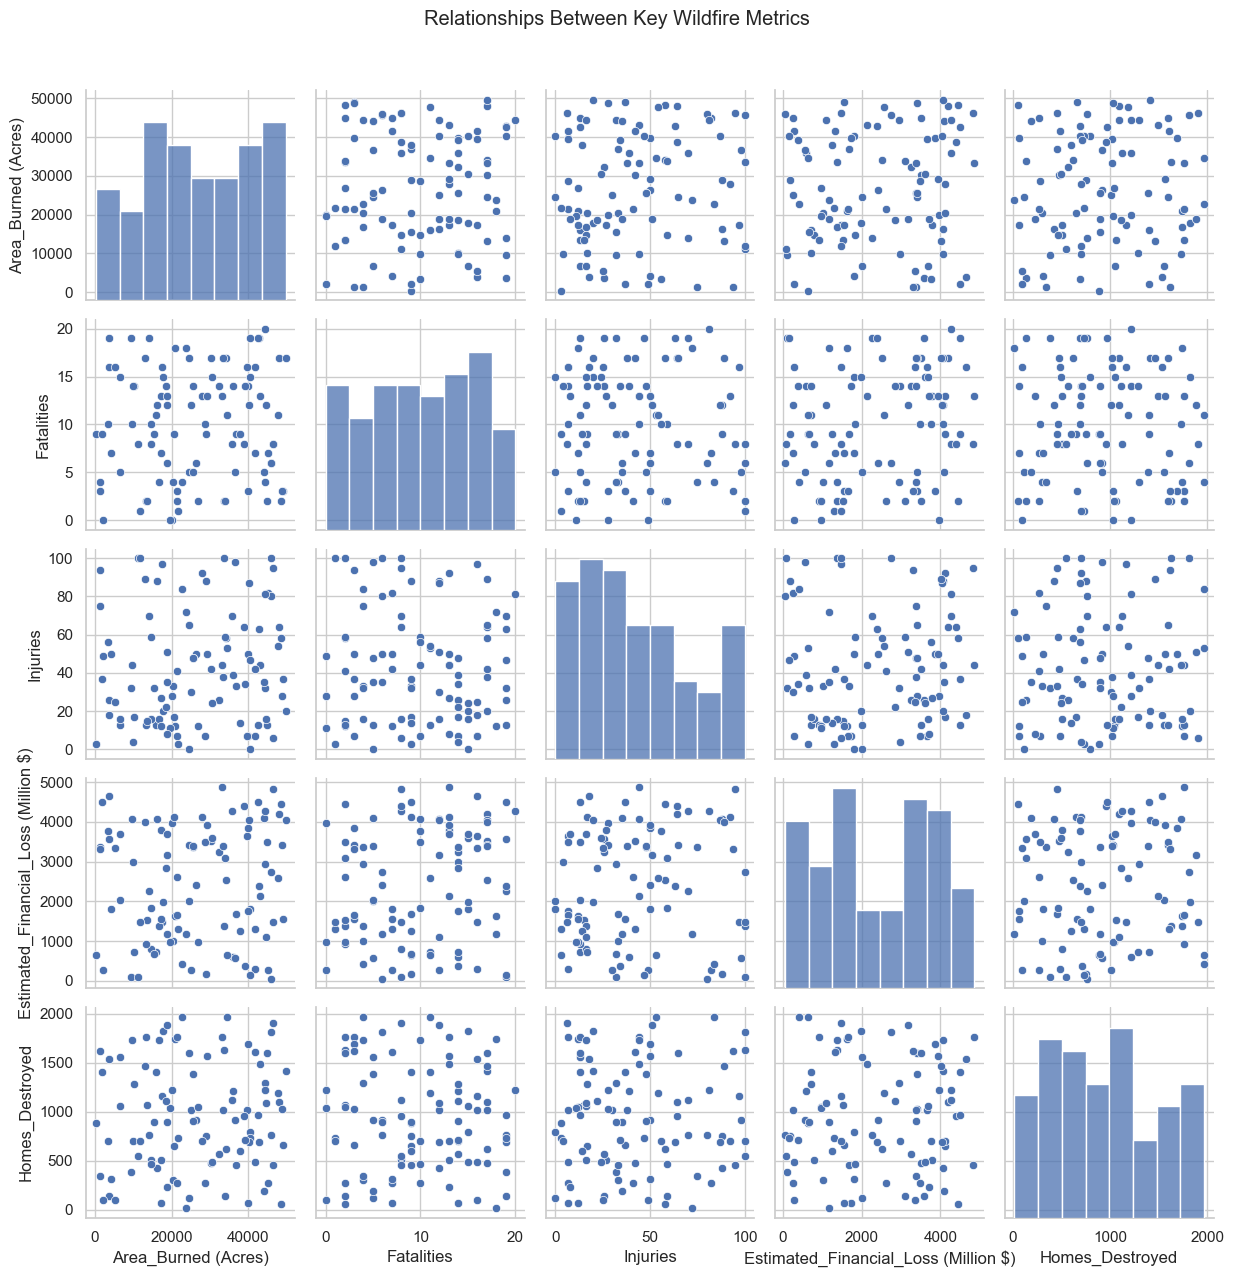

In [45]:
key_metrics = ['Area_Burned (Acres)', 'Fatalities', 'Injuries', 'Estimated_Financial_Loss (Million $)', 'Homes_Destroyed']
sns.pairplot(df[key_metrics])
plt.suptitle('Relationships Between Key Wildfire Metrics', y=1.02)
plt.tight_layout()
plt.show()

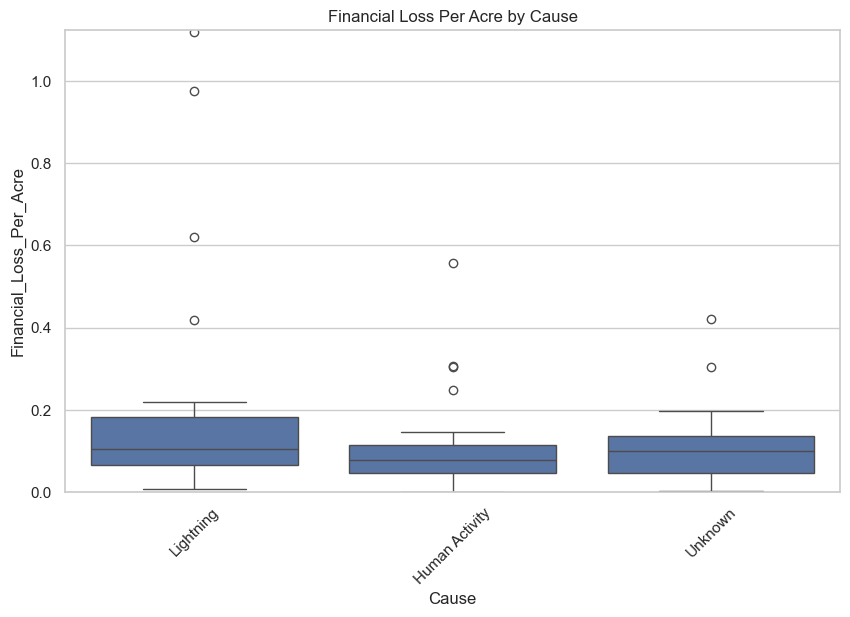

In [47]:
df['Financial_Loss_Per_Acre'] = df['Estimated_Financial_Loss (Million $)'] / df['Area_Burned (Acres)']
df['Fatalities_Per_Acre'] = df['Fatalities'] / df['Area_Burned (Acres)']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cause', y='Financial_Loss_Per_Acre')
plt.title('Financial Loss Per Acre by Cause')
plt.xticks(rotation=45)
plt.ylim(0, df['Financial_Loss_Per_Acre'].quantile(0.95))
plt.show()

Mean squared error: 2497971.50
R² score: -0.28


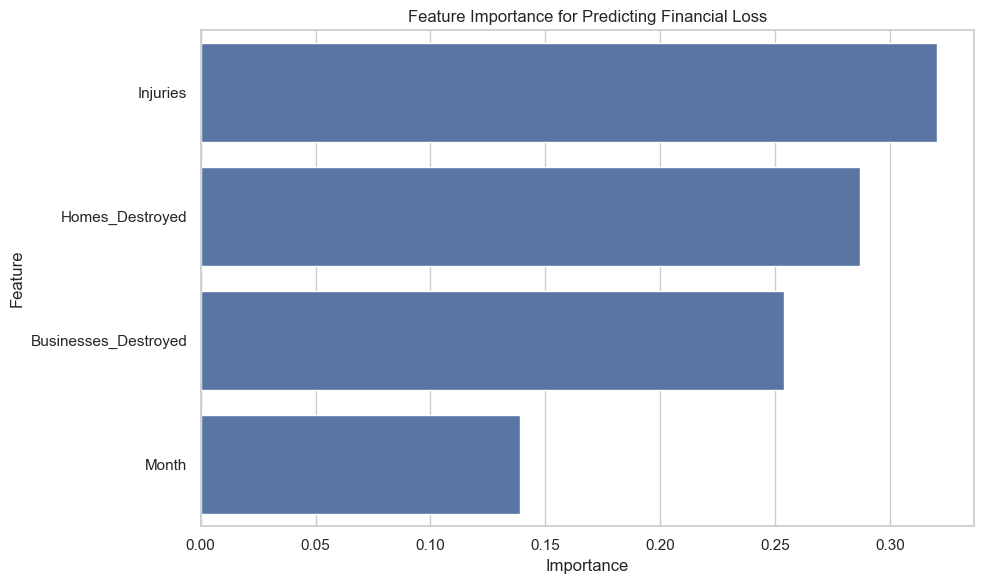

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = ['Month', 'Homes_Destroyed', 'Businesses_Destroyed', 'Injuries']
X = df[features]
y = df['Estimated_Financial_Loss (Million $)']

X = X.fillna(X.mean())
y = y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")
print(f"R² score: {r2:.2f}")

importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance, x='Importance', y='Feature')
plt.title('Feature Importance for Predicting Financial Loss')
plt.tight_layout()
plt.show()